In [8]:
import pandas as pd

# Load the historical Bitcoin price data
data = pd.read_csv('bitcoin.csv')  # Replace with your CSV file path
print(data.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [9]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values (e.g., forward fill)
data.fillna(method='ffill', inplace=True)

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['scaled_close'] = scaler.fit_transform(data[['Close']])

# Prepare features and target variable
data['target'] = data['scaled_close'].shift(-1)  # Predict the next day's price
data.dropna(inplace=True)  # Drop the last row with NaN target

X = data[['scaled_close']].values[:-1]  # Features
y = data['target'].values[:-1]  # Target


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-9-24279fe14d8a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Initialize models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
xgb_reg = XGBRegressor()

# Fit models
lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

models = [lin_reg, tree_reg, xgb_reg]
model_names = ['Linear Regression', 'Decision Tree', 'XGBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.4f}, R-squared: {r2:.4f}")


Linear Regression - MSE: 0.0001, R-squared: 0.9978
Decision Tree - MSE: 0.0002, R-squared: 0.9964
XGBoost - MSE: 0.0002, R-squared: 0.9972


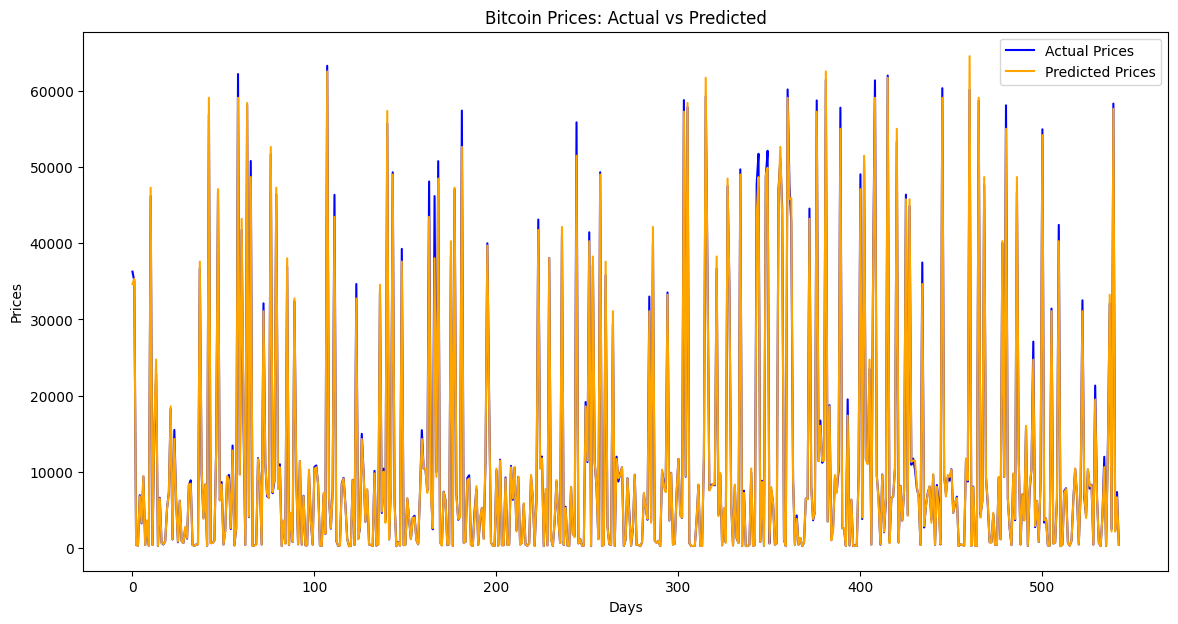

In [13]:
import matplotlib.pyplot as plt

# Use the best model (e.g., XGBoost) for predictions
y_pred = xgb_reg.predict(X_test)

# Inverse scale the predictions and actual values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='Actual Prices', color='blue')
plt.plot(y_pred_scaled, label='Predicted Prices', color='orange')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()
